In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
np.set_printoptions(suppress=True)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)
# print(len(trainL))
for i in range(len(trainL)):
    if(trainL[i] != 2):
        trainL[i] = 0
    else:
        trainL[i] = 1
for i in range(len(testL)):
    if(testL[i] != 2):
        testL[i] = 0
    else:
        testL[i] = 1
# print(len(trainL))
trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 2)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 2)
# print(trainData)
# print(trainLabel)

In [11]:
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.15))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))

print(model.summary())

adam = Adam(lr = 0.0005)
early_stop = EarlyStopping(patience=20)
model.compile(optimizer = adam, loss = "binary_crossentropy", metrics=['accuracy'])
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=100,
                            validation_data=(testData, testLabel),
                            callbacks=[early_stop],
                            batch_size=70, 
                            verbose=1)

# model.save('Normal_nonNormal_TST.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 8994, 32)          256       
_________________________________________________________________
activation_23 (Activation)   (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 4497, 32)          0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 4491, 32)          7200      
_________________________________________________________________
activation_24 (Activation)   (None, 4491, 32)          0         
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 2245, 32)          0         
__________

7110/7110 [==============================] - 7s 996us/step - loss: 0.2324 - acc: 0.9189 - val_loss: 0.3906 - val_acc: 0.8642
Epoch 18/100
7110/7110 [==============================] - 7s 997us/step - loss: 0.2393 - acc: 0.9162 - val_loss: 0.3913 - val_acc: 0.8551
Epoch 19/100
7110/7110 [==============================] - 7s 1ms/step - loss: 0.2177 - acc: 0.9244 - val_loss: 0.4465 - val_acc: 0.8589
Epoch 20/100
7110/7110 [==============================] - 7s 999us/step - loss: 0.2143 - acc: 0.9235 - val_loss: 0.4053 - val_acc: 0.8604
Epoch 21/100
7110/7110 [==============================] - 7s 997us/step - loss: 0.2113 - acc: 0.9241 - val_loss: 0.4362 - val_acc: 0.8589
Epoch 22/100
7110/7110 [==============================] - 7s 1ms/step - loss: 0.1987 - acc: 0.9324 - val_loss: 0.4648 - val_acc: 0.8652
Epoch 23/100
7110/7110 [==============================] - 7s 997us/step - loss: 0.1845 - acc: 0.9364 - val_loss: 0.4610 - val_acc: 0.8635
Epoch 24/100
7110/7110 [===========================

In [5]:
import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

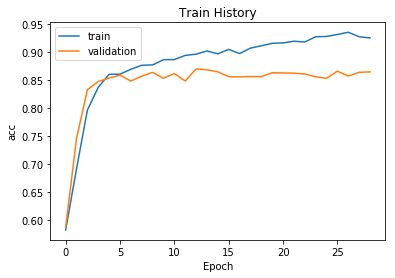

In [6]:
show_plot('acc', train_history_1)

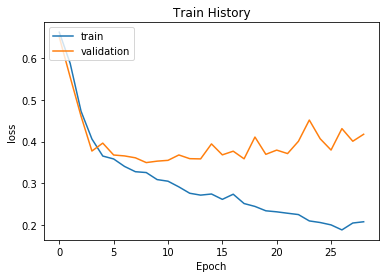

In [7]:
show_plot('loss', train_history_1)

In [8]:
import itertools
import pylab as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

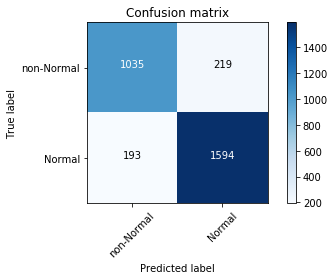

In [9]:
from sklearn.metrics import confusion_matrix
test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix(cnf_matrix, classes=['non-Normal','Normal'], title='Confusion matrix')